In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error,r2_score

#Step 1 : Loading the dataset into python environment and understanding the data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving car_age_price.csv to car_age_price.csv


In [3]:
data = pd.read_csv('car_age_price.csv')

In [6]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [8]:
data.shape

(112, 2)

In [9]:
data.dtypes

Year     int64
Price    int64
dtype: object

In [10]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


#Step 2 : Data cleaning

Handling missing values


In [11]:
data.isna().sum()

Year     0
Price    0
dtype: int64

Checking for outliers


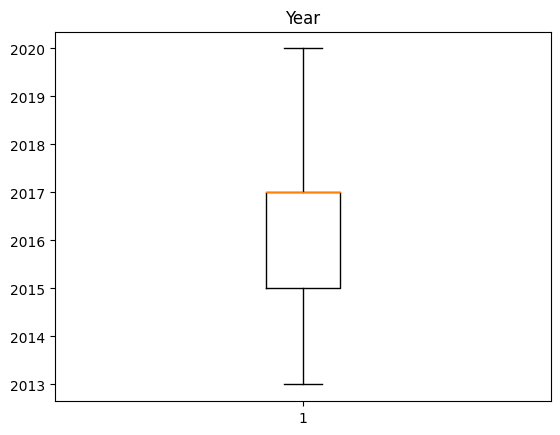

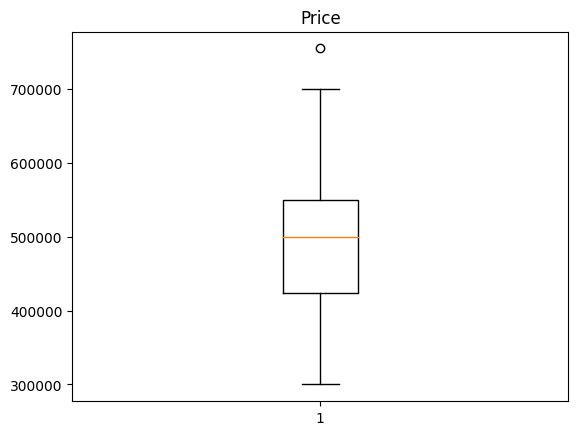

In [13]:
col = ['Year','Price']
for i in col:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

#Step 3 : Creating a Heatmap to Visualize the Correlation

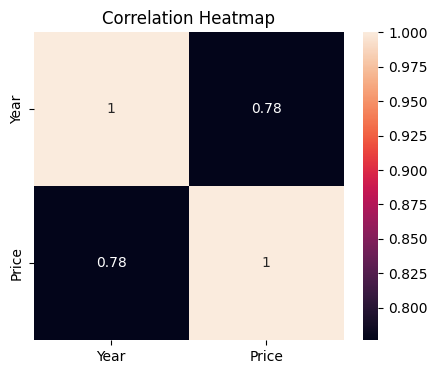

In [14]:
corrmatrix = data.corr()
plt.figure(figsize=(5, 4))
sns.heatmap(corrmatrix,annot = True)
plt.title('Correlation Heatmap')
plt.show()

#Step 4 : Preprocessing the Data and Perform Scaling

In [15]:
data.columns

Index(['Year', 'Price'], dtype='object')

In [36]:
y = data ['Price']   
X= data.drop(['Price'],axis = 1) 

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [38]:
print('X_train\n' , X_train.head())
print('X_test\n' , X_test.head())

X_train
     Year
81  2014
77  2015
15  2017
30  2019
45  2018
X_test
     Year
40  2019
65  2017
4   2018
47  2018
42  2018


In [39]:
print('y_train\n' , y_train.head())
print('y_test\n' , y_test.head())

y_train
 81    390000
77    325000
15    500000
30    650000
45    450000
Name: Price, dtype: int64
y_test
 40    525000
65    495000
4     465000
47    450000
42    550000
Name: Price, dtype: int64


#Step 5 : Training and Evaluating the Linear Regression Model

In [40]:
lr = LinearRegression()
linear_model = lr.fit(X_train,y_train)

In [41]:
y_predict_linear = linear_model.predict(X_test)

In [42]:
print('y_predict_linear:\n', y_predict_linear)

y_predict_linear:
 [599223.07304104 505265.04214995 552244.05759549 552244.05759549
 552244.05759549 411307.01125886 505265.04214995 552244.05759549
 599223.07304104 599223.07304104 317348.98036776 505265.04214995
 411307.01125886 646202.08848657 552244.05759549 599223.07304104
 317348.98036776 411307.01125886 505265.04214995 505265.04214995
 505265.04214995 505265.04214995 505265.04214995 505265.04214995
 505265.04214995 505265.04214995 411307.01125886 411307.01125886]


Calculating the Error for Linear Regression:

In [44]:
linear_mse = mean_squared_error(y_test,y_predict_linear)
linear_r2 = r2_score(y_test,y_predict_linear)

print(linear_mse)
print(linear_r2)

3878767151.073449
0.4347961632108023


#Step 6 : Training and Evaluating the Lasso Regression Model

In [43]:
l = Lasso()
lasso_model = l.fit(X_train, y_train)

In [45]:
y_predict_lasso = lasso_model.predict(X_test)

In [46]:
y_predict_lasso

array([599222.10828854, 505264.87581331, 552243.49205092, 552243.49205092,
       552243.49205092, 411307.64333805, 505264.87581331, 552243.49205092,
       599222.10828854, 599222.10828854, 317350.4108628 , 505264.87581331,
       411307.64333805, 646200.72452617, 552243.49205092, 599222.10828854,
       317350.4108628 , 411307.64333805, 505264.87581331, 505264.87581331,
       505264.87581331, 505264.87581331, 505264.87581331, 505264.87581331,
       505264.87581331, 505264.87581331, 411307.64333805, 411307.64333805])

Calculating the Error for Lasso Regression Model:

In [47]:
lasso_mse = mean_squared_error(y_test,y_predict_lasso)
lasso_r2 = r2_score(y_test,y_predict_lasso)

print(lasso_mse)
print(lasso_r2)

3878735896.222091
0.4348007175862566


#Step 7 : Comparing the performance of both models and evaluating the models

In [48]:
print("Linear Regression MSE:", linear_mse)
print("Linear Regression R2 Score:", linear_r2)
print("Lasso Regression MSE:", lasso_mse)
print("Lasso Regression R2 Score:", lasso_r2)

Linear Regression MSE: 3878767151.073449
Linear Regression R2 Score: 0.4347961632108023
Lasso Regression MSE: 3878735896.222091
Lasso Regression R2 Score: 0.4348007175862566


In terms of MSE, both Linear Regression and Lasso Regression model have similar values, indicating that they have similar prediction errors on the dataset.When comparing the R2 score, both models have similar scores.Hence,both Linear Regression and Lasso Regression model perform similarly in terms of prediction accuracy and explanatory power.

#Step 8 : Creating the model

In [49]:
if linear_mse < lasso_mse and linear_r2 > lasso_r2:
    selected_model = linear_model
    print("Selected model : Linear regression")
elif lasso_mse < linear_mse and lasso_r2 > linear_r2:
    selected_model = lasso_model
    print("Selected model : Lasso regression ")
else:
    print("Both models have similar performance.")

Selected model : Lasso regression 


#Step 9 : Prediciting the price of the 2022 model

In [50]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [51]:
predicted_price_2022 = selected_model.predict([[2022]])

In [52]:
print("Predicted price for a 2022 model second-hand Grand i10 is:", predicted_price_2022[0])

Predicted price for a 2022 model second-hand Grand i10 is: 740157.9570014179


**Predicted price for a 2022 model second-hand Grand i10 is around Seven Lakh Forty Thousand Rupees** 
 